In [45]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


PQ: BasePriorityQueue(nqueues:100, lag: 8, add:1, pop:10); Num_pop: 9992; Concurrent: 2; Average: 12.300240192153723; Medium: 7.0; 90th percentile: 25; 99th percentile: 104; ErrorCount: 8


(array([8.21009058e-02, 4.14813260e-02, 2.59111399e-02, 1.64319322e-02,
        1.03213686e-02, 6.07139332e-03, 3.93661309e-03, 2.58523845e-03,
        1.50805576e-03, 1.07718269e-03, 6.26724472e-04, 4.11287934e-04,
        3.13362236e-04, 1.95851397e-04, 1.76266258e-04, 1.56681118e-04,
        9.79256987e-05, 9.79256987e-05, 1.17510838e-04, 9.79256987e-05,
        9.79256987e-05, 1.76266258e-04, 9.79256987e-05, 7.83405589e-05,
        3.91702795e-05, 1.76266258e-04, 5.87554192e-05, 1.76266258e-04,
        5.87554192e-05, 5.87554192e-05, 1.95851397e-05, 1.95851397e-05,
        5.87554192e-05, 1.95851397e-05, 5.87554192e-05, 9.79256987e-05,
        0.00000000e+00, 5.87554192e-05, 7.83405589e-05, 1.95851397e-05,
        1.95851397e-05, 0.00000000e+00, 1.95851397e-05, 1.95851397e-05,
        3.91702795e-05, 1.95851397e-05, 1.95851397e-05, 1.95851397e-05,
        1.95851397e-05, 3.91702795e-05, 0.00000000e+00, 1.95851397e-05,
        1.95851397e-05, 0.00000000e+00, 1.95851397e-05, 0.000000

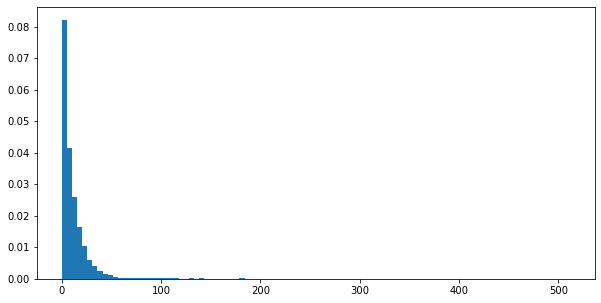

In [88]:
# baseline, one concurrent pop
import statistics
import random
from testrunner_v2 import TestRunnerV2
from distributed_pq import BasePriorityQueue
random.seed(5)

initial_item_count = 10000
num_pops = 10000
num_concurrent_pops = 2

pq1 = BasePriorityQueue(num_queues=100, num_queues_lb_add=1, num_queues_lb_pop=10)

out1, err1 = TestRunnerV2(queue=pq1, initial_item_count=initial_item_count, num_pops=num_pops, num_concurrent_pops = num_concurrent_pops).run()

plt.rcParams['figure.figsize'] = [10, 5]
plt.hist(out1, 100, density=True)

In [85]:
# baseline, one concurrent pop
import statistics
import random
from testrunner_v2 import TestRunnerV2
from distributed_pq import BasePriorityQueue
random.seed(5)

initial_item_count = 10000
num_pops = 10000

x_list, p50_list, p90_list, p99_list, avg_list, err_list = [], [], [], [], [], []
for i in range(1, 200, 5):
    x = i if i == 1 else i - 1
    pq = BasePriorityQueue(num_queues=100, num_queues_lb_add=1, num_queues_lb_pop=10)
    tr = TestRunnerV2(queue=pq, initial_item_count=initial_item_count, num_pops=num_pops, num_concurrent_pops = x, debug=True)
    out, err = tr.run()
    x_list.append(x)
    p50_list.append(statistics.median(out))
    sorted_out = sorted(out)
    p90_list.append(tr.get_percentile(sorted_out, 90))
    p99_list.append(tr.get_percentile(sorted_out, 99))
    avg_list.append(statistics.mean(out))
    err_list.append(err)


PQ: BasePriorityQueue(nqueues:100, lag: 0, add:1, pop:10); Num_pop: 10000; Concurrent: 1; Average: 10.0784; Medium: 7.0; 90th percentile: 24; 99th percentile: 47; ErrorCount: 0
PQ: BasePriorityQueue(nqueues:100, lag: 20, add:1, pop:10); Num_pop: 9980; Concurrent: 5; Average: 18.68697394789579; Medium: 8.0; 90th percentile: 33; 99th percentile: 234; ErrorCount: 20
PQ: BasePriorityQueue(nqueues:100, lag: 38, add:1, pop:10); Num_pop: 9962; Concurrent: 10; Average: 26.73910861272837; Medium: 8.0; 90th percentile: 62; 99th percentile: 309; ErrorCount: 38
PQ: BasePriorityQueue(nqueues:100, lag: 42, add:1, pop:10); Num_pop: 9958; Concurrent: 15; Average: 33.994476802570794; Medium: 9.0; 90th percentile: 96; 99th percentile: 368; ErrorCount: 32
PQ: BasePriorityQueue(nqueues:100, lag: 49, add:1, pop:10); Num_pop: 9951; Concurrent: 20; Average: 42.6117978092654; Medium: 10; 90th percentile: 126; 99th percentile: 443; ErrorCount: 49
PQ: BasePriorityQueue(nqueues:100, lag: 52, add:1, pop:10); Num_

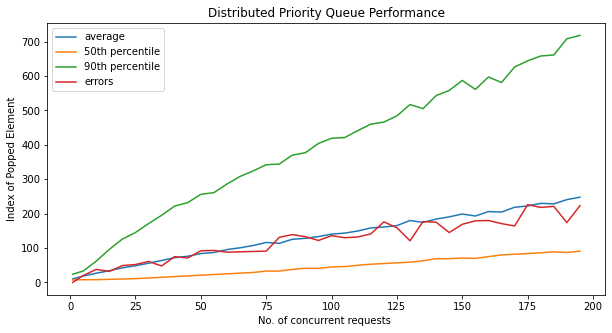

In [86]:
plt.plot(x_list, avg_list, label="average")
plt.plot(x_list, p50_list, label="50th percentile")
plt.plot(x_list, p90_list, label="90th percentile")
#plt.plot(x_list, p99_list, label="99th percentile")
plt.plot(x_list, err_list, label="errors")
plt.legend()
plt.title("Distributed Priority Queue Performance")
plt.xlabel("No. of concurrent requests ")
plt.ylabel("Index of Popped Element")
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

PQ: BasePriorityQueue(nqueues:100, lag: 20000, add:1, pop:10); Num_pop: 10000; Concurrent: 1; Average: 10.3905; Medium: 7.0; 90th percentile: 25; 99th percentile: 50; ErrorCount: 0
PQ: BasePriorityQueue(nqueues:100, lag: 20000, add:1, pop:10); Num_pop: 10000; Concurrent: 5; Average: 18.4187; Medium: 7.0; 90th percentile: 34; 99th percentile: 226; ErrorCount: 0
PQ: BasePriorityQueue(nqueues:100, lag: 20000, add:1, pop:10); Num_pop: 10000; Concurrent: 10; Average: 26.8155; Medium: 8.0; 90th percentile: 62; 99th percentile: 309; ErrorCount: 0
PQ: BasePriorityQueue(nqueues:100, lag: 20010, add:1, pop:10); Num_pop: 9990; Concurrent: 15; Average: 35.82272272272272; Medium: 9.0; 90th percentile: 101; 99th percentile: 408; ErrorCount: 0
PQ: BasePriorityQueue(nqueues:100, lag: 20000, add:1, pop:10); Num_pop: 10000; Concurrent: 20; Average: 44.2927; Medium: 11.0; 90th percentile: 134; 99th percentile: 446; ErrorCount: 0
PQ: BasePriorityQueue(nqueues:100, lag: 20000, add:1, pop:10); Num_pop: 1000

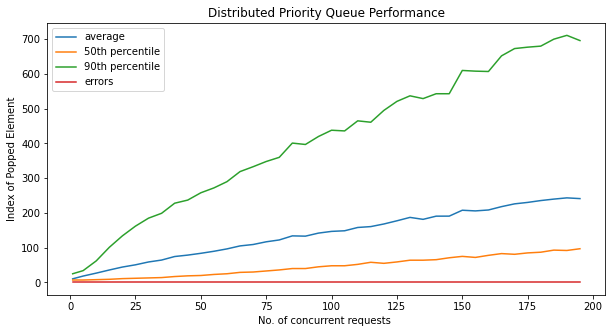

In [87]:
# baseline, one concurrent pop
import statistics
import random
from testrunner_v2 import TestRunnerV2
from distributed_pq import BasePriorityQueue
random.seed(5)

initial_item_count = 30000
num_pops = 10000

x_list, p50_list, p90_list, p99_list, avg_list, err_list = [], [], [], [], [], []
for i in range(1, 200, 5):
    x = i if i == 1 else i - 1
    pq = BasePriorityQueue(num_queues=100, num_queues_lb_add=1, num_queues_lb_pop=10)
    tr = TestRunnerV2(queue=pq, initial_item_count=initial_item_count, num_pops=num_pops, num_concurrent_pops = x, debug=True)
    out, err = tr.run()
    x_list.append(x)
    p50_list.append(statistics.median(out))
    sorted_out = sorted(out)
    p90_list.append(tr.get_percentile(sorted_out, 90))
    p99_list.append(tr.get_percentile(sorted_out, 99))
    avg_list.append(statistics.mean(out))
    err_list.append(err)

plt.plot(x_list, avg_list, label="average")
plt.plot(x_list, p50_list, label="50th percentile")
plt.plot(x_list, p90_list, label="90th percentile")
#plt.plot(x_list, p99_list, label="99th percentile")
plt.plot(x_list, err_list, label="errors")
plt.legend()
plt.title("Distributed Priority Queue Performance")
plt.xlabel("No. of concurrent requests ")
plt.ylabel("Index of Popped Element")
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()